# How To Use  
1) Input given data in the first cell
2) Run all cells
3) Figures are saved in ./Figures/  
Figures being made:
* Temperature with Liquid Compounds

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c
from astropy.time import Time
import Functions as func

In [2]:
# Functions for dataframes/pandas not included in Functions.py
def df_phase(row):
    '''Phase from refractive index
    For dataframe'''
    return func.phase(row['Refractive Index'])

def df_phase_to_day(row):
    '''Phase angle to day
    For dataframe'''
    return func.phase_to_day(row['Phase angle'], P)

def df_I_bead(row):
    '''Intensity of beads
    For dataframe'''
    return func.I_bead(A, row['Time of Peak'], P, R, a, Is, dR, area)

def df_n(row):
    '''refractive index as a function of wavelength = 550nm
    For dataframe'''
    return func.n_when(wave, 0.55, row['Chromatic Dispersion'], row['n(550nm)'])

def df_phase_800(row):
    '''Phase angle from 800nm
    For dataframe'''
    return func.phase(row['n(800nm)'])

def df_day_800(row):
    '''Day from phase angle, 800nm
    For dataframe'''
    return func.phase_to_day(row['Phase Angle (800nm)'], P)

def df_phase_400(row):
    '''Phase angle from 400nm
    For dataframe'''
    return func.phase(row['n(400nm)'])

def df_day_400(row):
    '''Day from phase angle, 400nm
    For dataframe'''
    return func.phase_to_day(row['Phase Angle (400nm)'], P)


In [3]:
# For 55 Cnc e
A = 0.3
R = 2.04*u.R_earth
a = 0.016*u.au
g = 1 #assume full phase
P = 0.736*u.day
t = np.linspace(0,P.value)*u.day

flux_ratio = func.lightcurve(A, t, P, R, a).decompose()

In [4]:
# flux from 55 Cnc (star)
L = 0.589*u.L_sun
d = 41*u.lyr
star_flux = L/(4.*np.pi*d**2.)

# flux from 55 Cnc + 55 Cnc e
system_I = star_flux + star_flux*flux_ratio

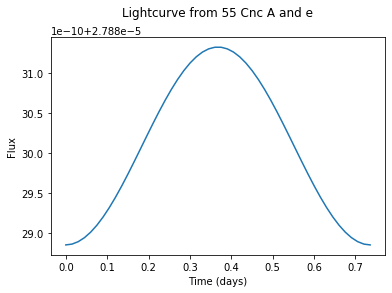

In [5]:
plt.plot(t, system_I)
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Lightcurve from 55 Cnc A and e\n')
plt.savefig('SimpleLightcurve.png')
plt.show()
plt.close()

The lightcurve of 55 Cnc system given extra light reflected from 55 Cnc e

In [6]:
# Composition
# Possible composition of hot super-Earths
# Compounds suggested by Schaefer(2012)

In [7]:
# Table of rock-forming compounds
info = {'Names':['KCl', 'KF', 'KOH', 'MgO', 'NaCl', 'NaF', 'NaOH', 'SiO', 'SiO2']}
comp = pd.DataFrame(data=info)
comp['Refractive Index'] = [1.4927, 1.3632, 1.4090, 1.7405, 1.5469, 1.3261, 1.3576,
                            1.7369, 1.5384]
comp['Melting'] = [770.0, 858.0, 360.0, 2825.0, 800.7, 993.0, 318.0, 1702.0, 1713.0]*u.C
comp['Boiling'] = [1420.0, 1502.0, 1327.0, 3600.0, 1465.0, 1704.0, 1388.0, 1880.0, 2950.0] * u.C
comp['Phase angle'] = comp.apply(df_phase, axis=1)
comp['Chromatic Dispersion'] = [-0.056254, -0.018988, np.nan, -0.071378, -0.064713, -0.018955, np.nan, 6.8718, -1.0916] * u.micron

comp

,Names,Refractive Index,Melting,Boiling,Phase angle,Chromatic Dispersion
0,KCl,1.4927,770.0,1420.0,0.410292,-0.056254
1,KF,1.3632,858.0,1502.0,0.661152,-0.018988
2,KOH,1.4090,360.0,1327.0,0.561790,NaN
3,MgO,1.7405,2825.0,3600.0,0.121582,-0.071378
4,NaCl,1.5469,800.7,1465.0,0.329193,-0.064713
5,NaF,1.3261,993.0,1704.0,0.752101,-0.018955
6,NaOH,1.3576,318.0,1388.0,0.674239,NaN
7,SiO,1.7369,1702.0,1880.0,0.124459,6.871800
8,SiO2,1.5384,1713.0,2950.0,0.341135,-1.091600


In [8]:
# Candidate exoplanets based on 'Plotting Hot Super Earths' ipynb
info = {'Names':['55 Cnc e', 'CoRoT-7 b', 'Kepler-10 b', 'Kepler-4 b', 'Kepler-406 b',
                 'Kepler-78 b', 'Kepler-89 b', 'Kepler-97 b', 'Kepler-98 b']}
planets = pd.DataFrame(data=info)
planets['Equilibrium Temperature'] = [1517, 1381, 1696, 1201, 1055, 1745, 1211, 1053, 1321] * u.C

planets

,Names,Equilibrium Temperature
0,55 Cnc e,1517.0
1,CoRoT-7 b,1381.0
2,Kepler-10 b,1696.0
3,Kepler-4 b,1201.0
4,Kepler-406 b,1055.0
5,Kepler-78 b,1745.0
6,Kepler-89 b,1211.0
7,Kepler-97 b,1053.0
8,Kepler-98 b,1321.0


In [9]:
# Day and night time info on 55 Cnc e and Kepler-10 b
cnc_day = 2697 # Kelvin
cnc_night = 1376
kep_day = 2770
kep_night = 62.5

# Extra
n_min = min(comp['Refractive Index'])
n_max = max(comp['Refractive Index'])

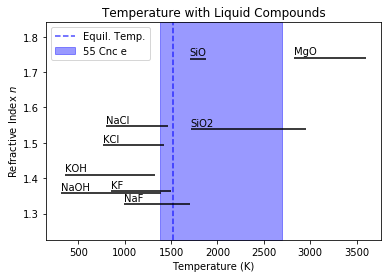

In [10]:
# Plotting

# Horizontal lines (refractive indexes) for each possible compound
plt.hlines(comp['Refractive Index'], comp['Melting'], comp['Boiling'])
for row in range(len(comp)):
    plt.text(comp['Melting'][row], comp['Refractive Index'][row]+0.01, comp['Names'][row])

# Vertical lines (temperature boundaries) for each possible planet
# 55 Cnc e
cnc_equ = planets['Equilibrium Temperature'][0]
plt.plot([cnc_equ, cnc_equ], [n_min-0.1, n_max+0.1], 'b--', zorder=1, alpha=0.7, label='Equil. Temp.')
plt.fill_betweenx([n_min-0.1, n_max+0.1], cnc_night, cnc_day, color='b', alpha=0.4, label='55 Cnc e')
# Kepler-10 b
# kep_equ = planets['Equilibrium Temperature'][2]
# plt.plot([kep_equ, kep_equ], [n_min-0.1, n_max+0.1], 'g--', zorder=1, alpha=0.7)
# plt.fill_betweenx([n_min-0.1, n_max+0.1], kep_night, kep_day, color='g', alpha=0.4, label='Kepler-10 b')

# # General equilibrium temperatures from other planets
# for row in range(len(planets)):
#     plt.plot([planets['Equilibrium Temperature'][row], planets['Equilibrium Temperature'][row]],
#              [n_min-0.1, n_max+0.1], 'k--', zorder=1, alpha=0.7)

#Extra
plt.xlabel('Temperature (K)')
plt.ylabel('Refractive Index $n$')
plt.ylim(n_min-0.1, n_max+0.1)
plt.title('Temperature with Liquid Compounds')
plt.legend(loc='upper left')
plt.savefig('TempofPlanetsandComp.png')
plt.show()
plt.close()

Given a planet's range of temperature, what rock-forming compounds can we find in liquid form? Generally, the equilibrium temperatures of planets lies between 1000C and 1700C. 55 Cnc e is likely to have SiO and SiO2 as a liquid in its atmosphere, along with other compounds. These compounds have significantly different indeces of refraction, so their rainbows will be well seperated.

In [11]:
# Lightcurve

In [12]:
# Constants - given before 
dR = 500 * u.km             # Estimated thickness of atmosphere
t = np.linspace(0, P.value)*u.day 
area = 4*np.pi*R**2.
Is = star_flux.decompose()

In [13]:
# Peak of polarizing light (phase angle) in days for each compound
comp['Time of Peak'] = comp.apply(df_phase_to_day, axis=1)
comp['Bead Intensity'] = comp.apply(df_I_bead, axis=1)
comp

,Names,Refractive Index,Melting,Boiling,Phase angle,Chromatic Dispersion,Time of Peak,Bead Intensity
0,KCl,1.4927,770.0,1420.0,0.410292,-0.056254,0.31993923275916947 d,1.4179758929485577e-16 kg / s3
1,KF,1.3632,858.0,1502.0,0.661152,-0.018988,0.2905539023532226 d,1.3235040340937139e-16 kg / s3
2,KOH,1.4090,360.0,1327.0,0.561790,NaN,0.3021930122695139 d,1.3656791027781817e-16 kg / s3
3,MgO,1.7405,2825.0,3600.0,0.121582,-0.071378,0.353758161381396 d,1.4739059585075146e-16 kg / s3
4,NaCl,1.5469,800.7,1465.0,0.329193,-0.064713,0.32943894990648914 d,1.43964783944769e-16 kg / s3
5,NaF,1.3261,993.0,1704.0,0.752101,-0.018955,0.2799003413606377 d,1.2798404353607152e-16 kg / s3
6,NaOH,1.3576,318.0,1388.0,0.674239,NaN,0.28902097813174843 d,1.3175105276325043e-16 kg / s3
7,SiO,1.7369,1702.0,1880.0,0.124459,6.871800,0.3534210832892897 d,1.473644766687473e-16 kg / s3
8,SiO2,1.5384,1713.0,2950.0,0.341135,-1.091600,0.32804009043108734 d,1.4367423775407327e-16 kg / s3


In [15]:
comp.to_csv('comp.csv', header=True, index=False)

In [14]:
Ip = func.I_planet(A, t, P, R, a, Is)   # Intensity of planet
tp = t                                  # Time of planet's peak
Ib = comp['Bead Intensity']             # Intensity of bead
tb = comp['Time of Peak']               # Time of bead's peak
Itot = []                               # Total intensity
ttot = []                               # Total peak time

In [15]:
for i in range(len(Ip)):
    # For each timestep, have planet and star intensity
    Itot.append(Ip[i].value + Is.value)
    ttot.append(tp[i].value)
    for f in range(len(Ib)):
        # For each peak time, insert the bead, planet, and star intensity
        if tp[i]<tb[f] and tb[f]<tp[i+1]:
            Itot.append(Ib[f].value + Ip[i].value + Is.value)
            ttot.append(tb[f].value)

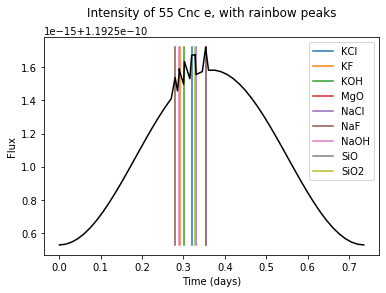

In [16]:
# Plotting
for row in range(len(comp)):
    plt.plot([comp['Time of Peak'][row].value, comp['Time of Peak'][row].value],
             [min(Itot), max(Itot)], label=comp['Names'][row])
plt.plot(ttot, Itot, 'k-')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.legend()
plt.title('Intensity of 55 Cnc e, with rainbow peaks\n')
plt.savefig('PeaksinOrbit.png')
plt.show()
plt.close()

In [21]:
with open('PeaksInOrbit.dat', 'w') as f:
    for i in range(len(ttot)):
        f.write("%s\t" % ttot[i])
        f.write("%s\n" % Itot[i])

Lightcurve of system, highlighting the contribution from the planet as well as the extra light reflected in the form of rainbows. At 1/2 intensity for parallel polarized light

This following cell is directly copied from the original python file. It is not suitable to run as is
without editing. I also don't know the relevance -- mostly testing to see if things work out
correctly. Most likely not going to use it, but I don't want to lose it

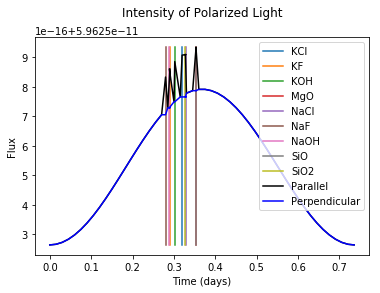

In [18]:
# Polarized parallel light
# Another for-loop nest with half values
Ipar = []
tpar = []
Iperp = []
tperp = []
for i in range(len(Ip)):
    # For each timestep, have planet and star intensity
    Ipar.append(Ip[i].value/2. + Is.value/2.)
    Iperp.append(Ip[i].value/2. + Is.value/2.)
    tpar.append(tp[i].value)
    tperp.append(tp[i].value)
    for f in range(len(Ib)):
        # For each peak time, insert the bead, planet, and star intensity
        if tp[i]<tb[f] and tb[f]<tp[i+1]:
            Ipar.append(Ib[f].value + Ip[i].value/2. + Is.value/2.)
            Iperp.append(Ip[i].value/2. + Is.value/2.)
            tpar.append(tb[f].value)
            tperp.append(tb[f].value)

# Plotting
for row in range(len(comp)):
    plt.plot([comp['Time of Peak'][row].value, comp['Time of Peak'][row].value],
             [min(Ipar), max(Ipar)], label=comp['Names'][row])
plt.plot(tpar, Ipar, 'k-', label='Parallel')
plt.plot(tperp, Iperp, 'b-', label='Perpendicular')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.legend()
plt.title('Intensity of Polarized Light\n')
plt.savefig('PolarizedLight.png')
plt.show()
plt.close()

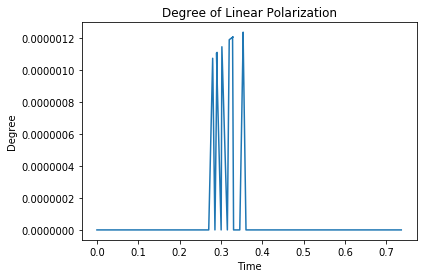

In [19]:
# Degree of linear poolarization
DoLP = []
for i in range(len(Ipar)):
    DoLP.append((Ipar[i] - Iperp[i])/(Ipar[i] + Iperp[i]))

# Degree of polarization
plt.plot(tpar, DoLP)
plt.title('Degree of Linear Polarization')
plt.ylabel('Degree')
plt.xlabel('Time')
plt.savefig('DegreePolarized.png')
plt.show()
plt.close()

In [20]:
# end of Lightcurve.py

In [21]:
# Orbit
# Revised way of showing lightcurve and transit

In [22]:
# Values for 55 Cncn e
Eclipse_time = 2455962.0697 # JD
t_ecl = Time(Eclipse_time, format='jd')
t_ecl = t_ecl.mjd           # convert to MJD
P = 0.7365478 # days

In [23]:
# Time range considered
times = ['2019-02-28T00:00:00', '2019-03-01T00:00:00'] # yyy-mm-dd hh:mm:ss
t = Time(times)     # exclude 'format' and 'scale' - default
t_init = t.mjd[0]   # first and last day in MJD
t_final = t.mjd[-1]
time_range = np.arange(t_init, t_final, 0.001)     # array of MJD days range

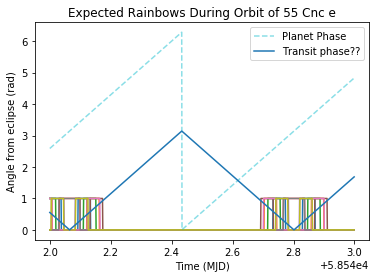

In [24]:
# Outputs phase angle
angle = func.MJD_to_phase(t_ecl, P, time_range)
planet_phase = np.mod(angle, (2*np.pi))

# Boolean array of when we see the rainbow
compound_phase = np.abs(planet_phase - np.pi)
close = 10.*(2*np.pi)/360.

for row in range(len(comp)):
    phase_angle = comp['Phase angle'][row]
    rainbow_when = (compound_phase > (phase_angle-close))*(compound_phase< (phase_angle+close))
    plt.plot(time_range, rainbow_when)

plt.plot(time_range, planet_phase, linestyle='--', alpha=0.5, label='Planet Phase')
plt.plot(time_range, np.abs(planet_phase-np.pi), label='Transit phase??')
plt.xlabel('Time (MJD)')
plt.ylabel('Angle from eclipse (rad)')
plt.legend()
plt.title('Expected Rainbows During Orbit of 55 Cnc e')
plt.savefig('orbit_tracker.png')
plt.show()
plt.close()


In [25]:
# # Check to see if the n_when function is working
# visible = np.linspace(400, 800)
# for row in range(len(comp)):
#    plt.plot(visible, func.n_when(visible, 550, comp['Chromatic Dispersion'][row], 
#                             comp['Refractive Index'][row]), label=comp['Names'][row])
# plt.legend()
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Refractive index')
# plt.savefig('chrom.png')
# plt.show()

In [26]:
# Find the rainbow peak at red and blue wavelengths
# New dataframe for new information
# SiO has too high of a refractive index. Removing from dataframe
# SiO2 is also unrealistic. Removing from dataframe
info = {'Names':['KCl', 'KF', 'MgO', 'NaCl', 'NaF']}
visible = pd.DataFrame(data=info)
visible['Chromatic Dispersion'] = [-0.056254, -0.018988, -0.071378, -0.064713, -0.018955] * u.micron
visible['n(550nm)'] = comp['Refractive Index']
# 800nm
wave = 0.8
visible['n(800nm)'] = visible.apply(df_n, axis=1)
visible['Phase Angle (800nm)'] = visible.apply(df_phase_800, axis=1)
visible['Peak Time (800nm)'] = visible.apply(df_day_800, axis=1)
# visible

In [27]:
# 400nm
wave = 0.4
visible['n(400nm)'] = visible.apply(df_n, axis=1)
visible['Phase Angle (400nm)'] = visible.apply(df_phase_400, axis=1)
visible['Peak Time (400nm)'] = visible.apply(df_day_400, axis=1)

# visible

In [28]:
# Difference
mult = 1440 # minutes in a day
visible['Time Lapse (min)'] = visible['Peak Time (400nm)']*mult - visible['Peak Time (800nm)']*mult
visible

,Names,Chromatic Dispersion,n(550nm),n(800nm),Phase Angle (800nm),Peak Time (800nm),n(400nm),Phase Angle (400nm),Peak Time (400nm),Time Lapse (min)
0,KCl,-0.056254,1.4927,1.478636,0.433365,0.317473,1.501138,0.396867,0.321751,6.160963
1,KF,-0.018988,1.3632,1.358453,0.672231,0.289471,1.366048,0.654579,0.291541,2.979756
2,MgO,-0.071378,1.4090,1.391155,0.598948,0.298062,1.419707,0.540384,0.304927,9.885809
3,NaCl,-0.064713,1.7405,1.724322,0.134777,0.352475,1.750207,0.113988,0.354912,3.509279
4,NaF,-0.018955,1.5469,1.542161,0.335817,0.328908,1.549743,0.325260,0.330145,1.782064


This tells us when we'll see the peak of the blue (400nm), green (550nm), and red (800nm) light during the orbit for each compound. The final column tells us how long each of the compound's rainbows will last (on the order of minutes).

Now let us consider 55 Cnc as a non-point source of light, so that its angular diameter as seen from 55 Cnc e is significant enough to extend the rainbow.

In [29]:
R_star = 0.960 * u.Rsun   # 55 Cnc radius, Wikipedia
star_diameter = func.angular_diameter(R_star, a)    # Angular diameter of 55 Cnc
star_time = func.phase_to_day(star_diameter.value, P)     # How long does it take for 55 Cnc to pass 55 Cnc?
print("55 Cnc angular diameter:", star_diameter)
print("Time to pass star's angular diameter: ", star_time, " in days; ", star_time*mult, " in min")

55 Cnc angular diameter: 0.565563591251581 rad
Time to pass star's angular diameter:  0.3019755817854382  in days;  434.844837771031  in min


Now we have to consider the secondary eclipse possibly blocking the planet at a time when we would otherwise see a rainbow. Half the star's size is about 0.28 radians. This effects NaCl, which has a phase angle from 0.13 to 0.11 radians. While we can keep the compound in our calculations for now, I think it's safe to say it won't be seen in this system.

In [30]:
# Signal to Noise

In [31]:
# Constants and important numbers
V_Vega = 9.6e10 /u.s/u.meter**2./u.um           # Photons/s/m^2/micron, V_band
M_Vega = 0
M_Cnc = 5.95

telescope_diam = 8.4 * u.meter  # One of the mirrors on VLT?
band_width = 50*u.nm
efficiency = 0.05   # efficiency of the telescope, insturments, etc.
exposure_time = 1*u.hour
pol_frac = 0.1   # fraction of photons polarized

In [32]:
telescope_area = np.pi*(telescope_diam/2)**2

# Intensity from Vega
I_Vega = V_Vega * band_width * telescope_area * efficiency
I_Vega = I_Vega.decompose()
print('Vega Intensity: ', I_Vega)

Vega Intensity:  13300246658.237751 1 / s


In [33]:
# Intensity from 55 Cnc
# M1 - M2 = -2.5 log10 (I1/I2)
I_Cnc = (10**((M_Cnc-M_Vega)/-2.5)) * I_Vega
print('55 Cnc Intsity: ', I_Cnc)

55 Cnc Intsity:  55444656.244229615 1 / s


In [34]:
# Intensity from 55 Cnc e
R = 2.04*u.R_earth
a = 0.016*u.au
planet_ratio = (R**2/(4*a**2)).decompose()  # Fraction of starlight reflected from planet surface area
I_Cnc_e = I_Cnc * planet_ratio
print('55 Cnc e Intensity: ', I_Cnc_e)

55 Cnc e Intensity:  409.59240740433074 1 / s


400 photons every second from the planet. Assume 10% is polarized. So 40 photons are polarized (hopefully). Every second we'll expect 5.5e7 photons from the star, with 40 polarized photons. How long do we need to observe to have enough photons to account for noise? 

In [35]:
signal = I_Cnc_e * pol_frac  # Number of polarized photons per second
signal_to_noise = func.signoise(exposure_time, signal, I_Cnc)
print(signal_to_noise)

0.3300451083038584


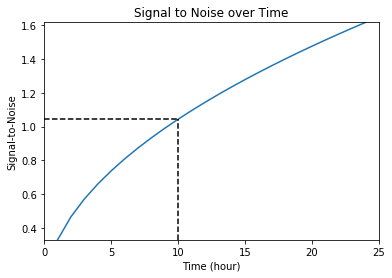

In [36]:
# When is the signal to noise 1?
time_frame = np.arange(1, 25, 1)
signalnoise = func.signoise(time_frame*u.hour, signal, I_Cnc)
# for i in range(len(time_frame)):
#     print(time_frame[i], signalnoise[i])

plt.plot(time_frame, signalnoise)
plt.plot((10,10), (signalnoise[0], signalnoise[9]), 'k--')
plt.plot((0, 10), (signalnoise[9], signalnoise[9]), 'k--')
plt.xlim(0, 25)
plt.ylim(signalnoise[0], signalnoise[-1])
plt.title('Signal to Noise over Time')
plt.ylabel('Signal-to-Noise')
plt.xlabel('Time (hour)')
plt.show()

So it takes up to 10 hours total to get a signal-to-noise over 1, and well over 24 hours to even start to reach 2. This is ok because we can take multiple nights of exposures. The whole orbit is 0.7 days so multiple nights in a row isn't too bad either.

In [37]:
# PyMieDAP Results
# Running Stam's code on 5 compounds, 3 wavelengths, 3 sized droplets
# Changed the resolution from 1 degree to 0.1 degrees

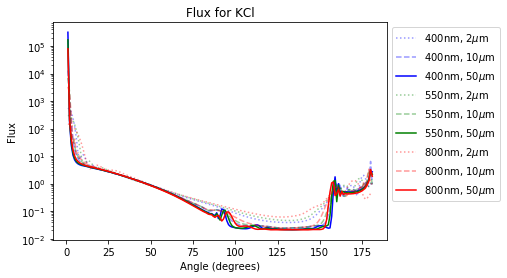

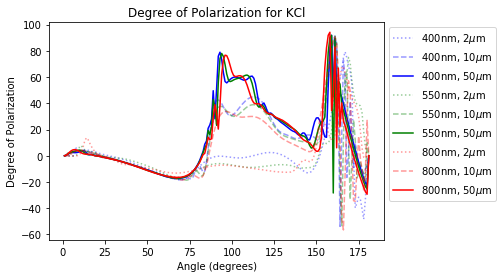

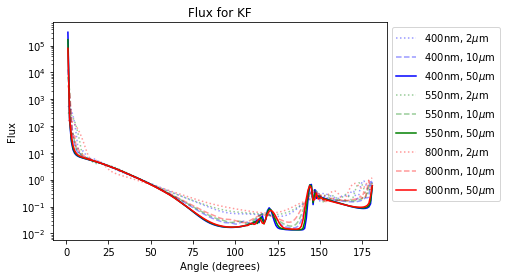

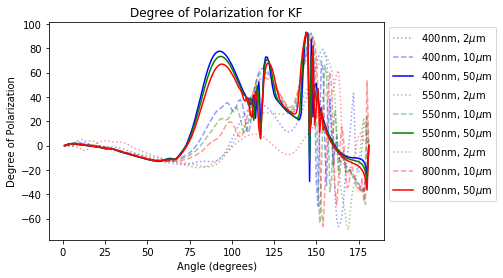

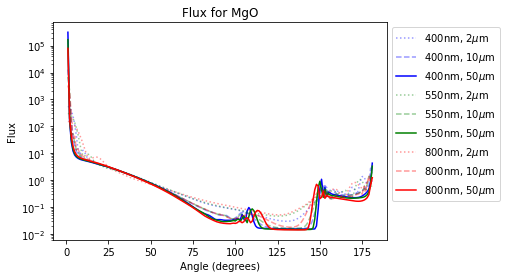

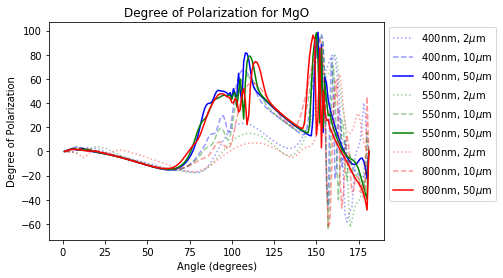

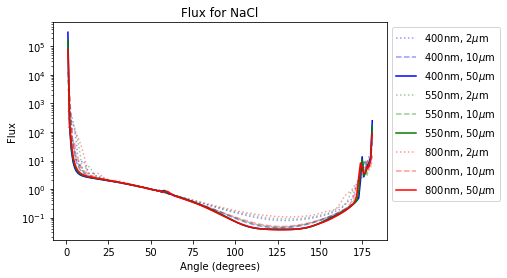

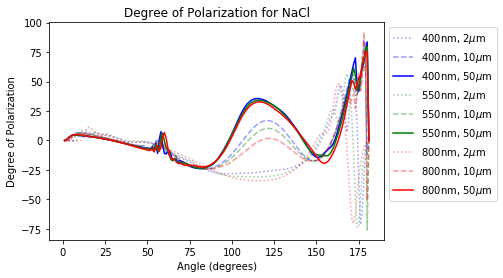

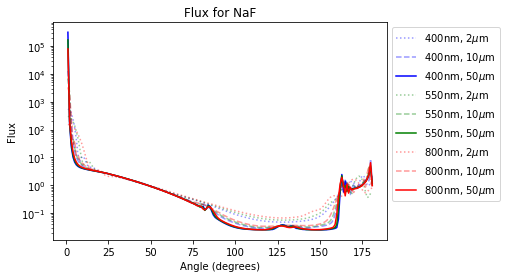

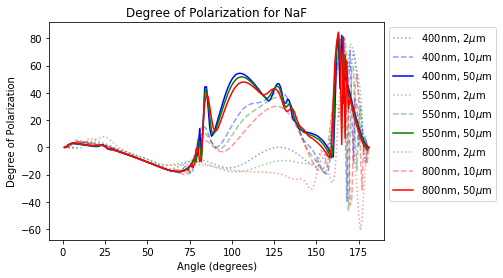

In [43]:
wavelength = ['400', '550', '800']
compound_name = visible['Names']
droplet_size = ['02', '10', '50']

infile = 'MIECODE/PROGRAM_KCl/Results/mie.out400nm02um'
indata = np.genfromtxt(infile)
angle = indata[:,0]

for chem in compound_name:
    directory = 'MIECODE/PROGRAM_'+chem+'/Results/'
    flux = []
    dop = []
    for wave in wavelength:
        for size in droplet_size:
            file = directory+'mie.out'+wave+'nm'+size+'um'
            data = np.genfromtxt(file)
            flux.append(data[:,2])
            dop.append(data[:,-1])
    plt.plot(angle, flux[0], 'b:', alpha=0.4, label='400nm, 2$\mu$m')
    plt.plot(angle, flux[1], 'b--', alpha=0.4, label='400nm, 10$\mu$m')
    plt.plot(angle, flux[2], 'b-', label='400nm, 50$\mu$m')
    plt.plot(angle, flux[3], 'g:', alpha=0.4, label='550nm, 2$\mu$m')
    plt.plot(angle, flux[4], 'g--', alpha=0.4, label='550nm, 10$\mu$m')
    plt.plot(angle, flux[5], 'g-', label='550nm, 50$\mu$m')
    plt.plot(angle, flux[6], 'r:', alpha=0.4, label='800nm, 2$\mu$m')
    plt.plot(angle, flux[7], 'r--', alpha=0.4, label='800nm, 10$\mu$m')
    plt.plot(angle, flux[8], 'r-', label='800nm, 50$\mu$m')
    plt.legend(bbox_to_anchor=(1., 1.))
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Flux')
    plt.yscale('log')
    plt.title('Flux for '+chem)
    plt.savefig(directory+chem+'flux.png', bbox_inches='tight')
    plt.show()
    plt.close()
    
    plt.plot(angle, dop[0], 'b:', alpha=0.4, label='400nm, 2$\mu$m')
    plt.plot(angle, dop[1], 'b--', alpha=0.4, label='400nm, 10$\mu$m')
    plt.plot(angle, dop[2], 'b-', label='400nm, 50$\mu$m')
    plt.plot(angle, dop[3], 'g:', alpha=0.4, label='550nm, 2$\mu$m')
    plt.plot(angle, dop[4], 'g--', alpha=0.4, label='550nm, 10$\mu$m')
    plt.plot(angle, dop[5], 'g-', label='550nm, 50$\mu$m')
    plt.plot(angle, dop[6], 'r:', alpha=0.4, label='800nm, 2$\mu$m')
    plt.plot(angle, dop[7], 'r--', alpha=0.4, label='800nm, 10$\mu$m')
    plt.plot(angle, dop[8], 'r-', label='800nm, 50$\mu$m')
    plt.legend(bbox_to_anchor=(1., 1.))
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Degree of Polarization')
    plt.title('Degree of Polarization for '+chem)
    plt.savefig(directory+chem+'dop.png', bbox_inches='tight')
    plt.show()
    plt.close()

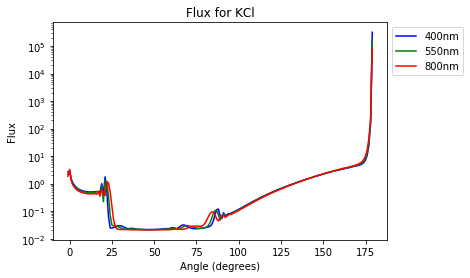

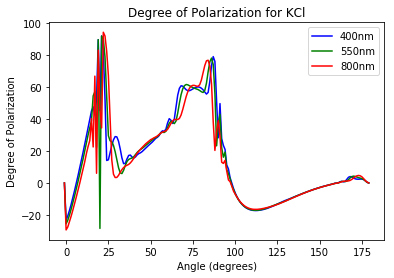

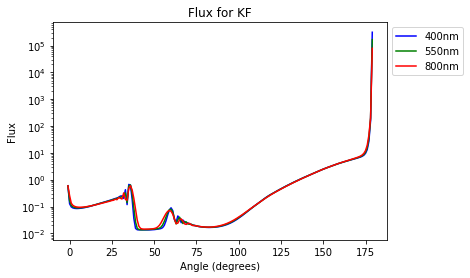

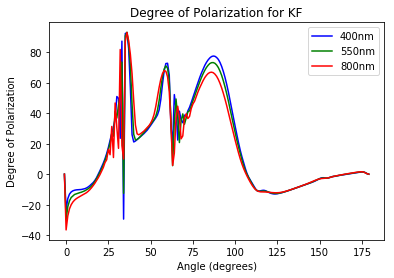

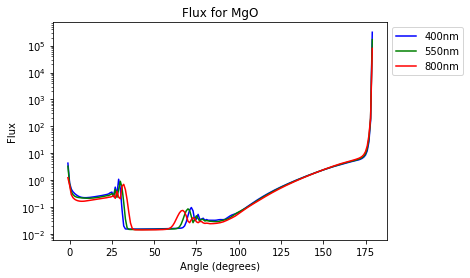

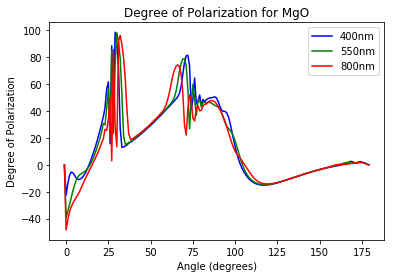

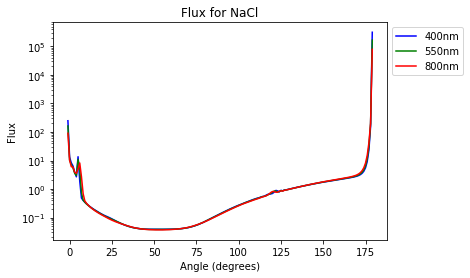

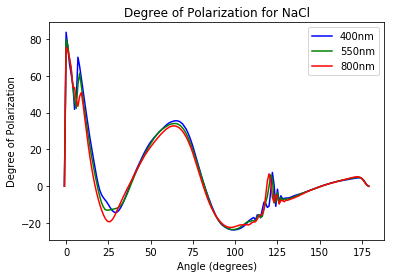

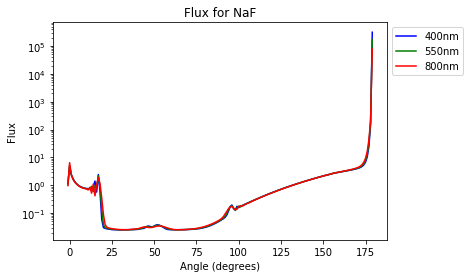

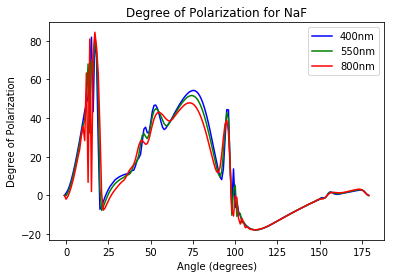

In [44]:
# JUST 50 MICRONS
angle = 180 - angle
for chem in compound_name:
    directory = 'MIECODE/PROGRAM_'+chem+'/Results/'
    flux = []
    dop = []
    for wave in wavelength:
        size = '50'
        file = directory+'mie.out'+wave+'nm'+size+'um'
        data = np.genfromtxt(file)
        flux.append(data[:,2])
        dop.append(data[:,-1])
    plt.plot(angle, flux[0], 'b-', label='400nm')
    plt.plot(angle, flux[1], 'g-', label='550nm')
    plt.plot(angle, flux[2], 'r-', label='800nm')
    plt.legend(bbox_to_anchor=(1., 1.))
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Flux')
    plt.yscale('log')
    plt.title('Flux for '+chem)
#     plt.savefig(directory+chem+'50flux.png', bbox_inches='tight')
    plt.show()
    plt.close()
    
    plt.plot(angle, dop[0], 'b-', label='400nm')
    plt.plot(angle, dop[1], 'g-', label='550nm')
    plt.plot(angle, dop[2], 'r-', label='800nm')
    plt.legend(bbox_to_anchor=(1., 1.))
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Degree of Polarization')
    plt.title('Degree of Polarization for '+chem)
#     plt.savefig(directory+chem+'50dop.png', bbox_inches='tight')
    plt.show()
    plt.close()

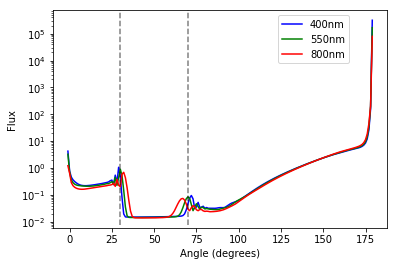

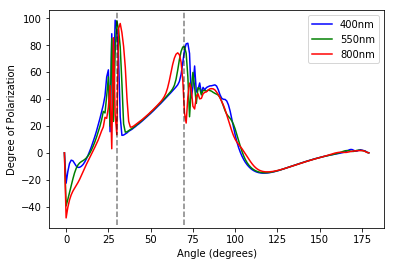

In [80]:
# JUST MGO 50 MICRONS
chem = 'MgO'
directory = 'MIECODE/PROGRAM_'+chem+'/Results/'
flux = []
dop = []
for wave in wavelength:
    size = '50'
    file = directory+'mie.out'+wave+'nm'+size+'um'
    data = np.genfromtxt(file)
    flux.append(data[:,2])
    dop.append(data[:,-1])

    
plt.plot(angle, flux[0], 'b-', label='400nm')
plt.plot(angle, flux[1], 'g-', label='550nm')
plt.plot(angle, flux[2], 'r-', label='800nm')
plt.axvline(x=30, ymin=min(flux[0]), ymax=max(flux[0]), color='k', linestyle='--', alpha=0.5)
plt.axvline(x=70, ymin=min(flux[0]), ymax=max(flux[0]), color='k', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(0.9, 1.))
plt.xlabel('Angle (degrees)')
plt.ylabel('Flux')
plt.yscale('log')
# plt.title('Flux for '+chem)
plt.savefig(directory+chem+'50flux.png', bbox_inches='tight')
plt.show()
plt.close()

plt.plot(angle, dop[0], 'b-', label='400nm')
plt.plot(angle, dop[1], 'g-', label='550nm')
plt.plot(angle, dop[2], 'r-', label='800nm')
plt.axvline(x=30, ymin=min(flux[0]), ymax=max(flux[0]), color='k', linestyle='--', alpha=0.5)
plt.axvline(x=70, ymin=min(flux[0]), ymax=max(flux[0]), color='k', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Angle (degrees)')
plt.ylabel('Degree of Polarization')
# plt.title('Degree of Polarization for '+chem)
plt.savefig(directory+chem+'50dop.png', bbox_inches='tight')
plt.show()
plt.close()

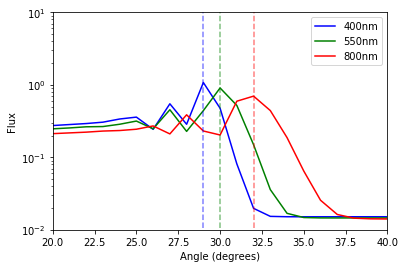

In [69]:
plt.plot(angle, flux[0], 'b-', label='400nm')
plt.plot(angle, flux[1], 'g-', label='550nm')
plt.plot(angle, flux[2], 'r-', label='800nm')
plt.axvline(x=32, ymin=10e-3, ymax=10, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=30, ymin=10e-3, ymax=10, color='g', linestyle='--', alpha=0.5)
plt.axvline(x=29, ymin=10e-3, ymax=10, color='b', linestyle='--', alpha=0.5)
plt.xlim(20,40)
plt.ylim(10e-3, 10)
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Angle (degrees)')
plt.ylabel('Flux')
plt.yscale('log')
# plt.title('Flux for '+chem)
plt.savefig(directory+chem+'50flux2040.png', bbox_inches='tight')
plt.show()
plt.close()
